In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

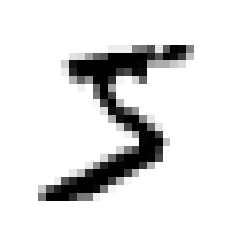

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [11]:
# y values are mapped to strings, machine learning algorithms usually work with numbers
# thus we convert from string to an integer
# ie '5' -> 5
y = y.astype(np.uint8)

In [9]:
# Making training set and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[6000:]

In [10]:
# Simplifying problem to binary classification problem instead of a mult-classification problem
# We now are trying to solve whether a digit is a 5 or not
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
digits_that_are_fives = X_train[y_train_5]

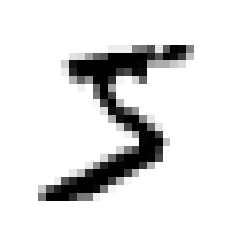

In [15]:
first_five = digits_that_are_fives[0]
first_five_image = first_five.reshape(28, 28)
plt.imshow(first_five_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
sgd_clf.predict([first_five])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5,scoring='accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [20]:
np.bincount(y_train_5)

array([54579,  5421])

In [21]:
5421 / 54579 # 5's only represent 10% of the data in the training set

0.09932391579178805

In [22]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [23]:
never_5_clf = Never5Classifier()

In [24]:
never_5_clf = never_5_clf.fit(X_train, y_train_5)

In [25]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 5, scoring = 'accuracy') # We that a model that always predicts not 5's has an accuracy of over 90%. We conclude that accuracy is not a very good metric for skew class problems

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 5)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

In [28]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_perfect_predictions, y_train_5)# a perfect predictor would have all zeros on non-diagnol

array([[54579,     0],
       [    0,  5421]])

In [29]:
from sklearn.metrics import precision_score, recall_score # sklearn has functionality to directly measure precision and recall

In [30]:
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [31]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [32]:
y_train_5_predict = cross_val_predict(never_5_clf, X_train, y_train_5, cv = 5)

In [33]:
precision_score(y_train_5, y_train_5_predict)

/home/sergio/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [34]:
recall_score(y_train_5, y_train_5_predict)

0.0

In [35]:
# it is often useful to combine both attributes into a single metric. 
from sklearn.metrics import f1_score

In [36]:
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [37]:
y_scores = sgd_clf.decision_function([some_digit])

In [38]:
y_scores

array([2164.22030239])

In [39]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [40]:
y_some_digit_pred

array([ True])

In [41]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [42]:
print(y_some_digit_pred)

[False]


In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 5, method = 'decision_function')

In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precisons, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'recall')

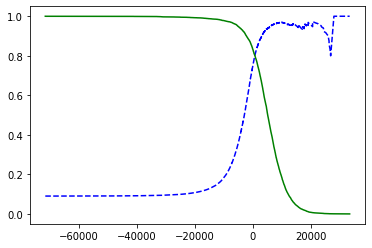

In [47]:
plot_precision_recall_vs_threshold(precisons, recalls, thresholds)
plt.show()

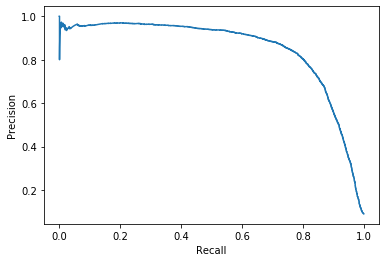

In [48]:
plt.plot(recalls, precisons)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [49]:
threshold_90_precision = thresholds[np.argmax(precisons >= 0.9)]

In [50]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [51]:
precision_score(y_train_5, y_train_pred_90)

0.9002016129032258

In [52]:
recall_score(y_train_5, y_train_pred_90)

0.6589190186312488

In [53]:
f1_score(y_train_5, y_train_pred_90)

0.760890403663862

In [54]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

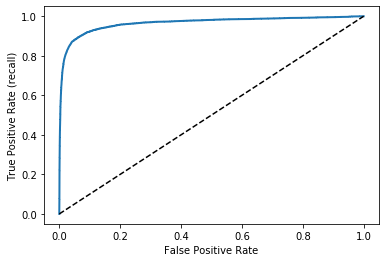

In [55]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall)')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9648211175804801

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas = cross_val_predict(forest_clf, X_train, y_train_5, cv = 5, method = 'predict_proba')

In [58]:
y_scores_forst = y_probas[:, 1]
fpr_forest, tpr_forst, thresholds_forest = roc_curve(y_train_5, y_scores_forst)

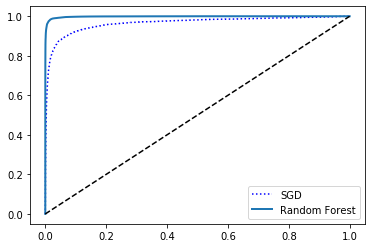

In [59]:
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forst, 'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

In [60]:
from sklearn.svm import SVC

In [61]:
svm_clf = SVC() # Create support-vector machine 

In [62]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [64]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [65]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [66]:
np.argmax(some_digit_scores)

5

In [67]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [68]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [69]:
# saving models
import joblib

joblib.dump(ovr_clf, 'support_vector_machine_one_versus_rest.pkl')
joblib.dump(sgd_clf, 'stohastic_classifier.pkl')
# to load model 
## loaded_support_vector_machine = joblib.load('support_vector_machine_one_versus_rest.pkl')
## loaded_sgd_classifier = joblib.load('stohastic_classifier.pkl')

['stohastic_classifier.pkl']

In [70]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [71]:
len(ovr_clf.estimators_)

10

In [72]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [74]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [75]:
cross_val_score(sgd_clf, X_train, y_train, scoring = 'accuracy')

array([0.88083333, 0.88325   , 0.88116667, 0.86625   , 0.8875    ])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = 'accuracy')

NameError: name 'X_train' is not defined

In [77]:
y_train_predictions = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_predictions)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

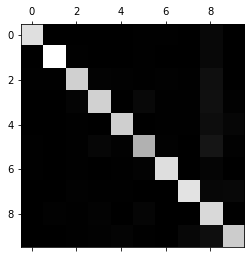

In [78]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [79]:
cl_a, cl_b = 3, 5

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#y_train_large = (y_train >= 7)
#y_train_odd = (y_train % 2 == 1)
#y_multilabel = np.c_[y_train_large, y_train_odd]

#knn_clf = KNeighborsClassifier()
#knn_clf.fit(X_train, y_multilabel)

In [82]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

In [1]:
# We believe that a combinations of the specified parameters will give us 
param_grid = [{'n_neighbors' : [1, 2, 3, 4, 5], 'weights' : ['uniform', 'distance']}]

In [17]:
from sklearn.model_selection import GridSearchCV

In [23]:
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True)

In [20]:
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_predictions = knn_clf.predict(X_train_scaled)
accuracy_score(y_predictions, y_train)

0.96425

In [ ]:
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Save our hard-earned model
import joblib
joblib.dump(grid_search,'grid_search_knn.pkl')

In [ ]:
# The conclusion on optimized knn-model on test set
from sklearn.model_selection import cross_val_score
cross_val_score(grid_search, X_test_scaled, y_test, cv = 3,scoring='accuracy')

In [20]:
# Even though the show was supposed to be over we decide to start from scratch and do data augmentation to the training set
# and see how our optimized models performs
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape(-1)

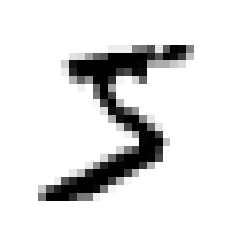

In [21]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [26]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/sergio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-d4dd0181d5d2>", line 6, in <module>
    X_train_augmented.append(shift_image(image, dx, dy))
  File "<ipython-input-20-b2e432f62bcb>", line 7, in shift_image
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
  File "/home/sergio/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py", line 529, in shift
    filtered = spline_filter(input, order, output=numpy.float64)
  File "/home/sergio/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py", line 135, in spline_filter
    spline_filter1d(input, order, axis, output=output, mode=mode)
  File "/home/sergio/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py", line 104, in spline_filter1d
    _nd_image.spline_filter1d(input, order, axis, output, mo

KeyboardInterrupt: 

In [ ]:
X_train_augmented = np.array(X_train_augmented)

In [ ]:
y_train_augmented = np.array(y_train_augmented)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)


NameError: name 'KNeighborsClassifier' is not defined

In [40]:
# later tonight try to test your model using a support-vector machine then test it using logistic regression
# fine tune this models using gridsearch then use ensemble methods and see how your model compares


ModuleNotFoundError: No module named 'cv2'

In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

svm_clf = OneVsRestClassifier(SVC(kernel = 'rbf', verbose= True))



In [17]:
svm_clf.fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=True),
                    n_jobs=None)

In [18]:
from sklearn.metrics import accuracy_score

In [12]:
import joblib

In [13]:
svm_clf = joblib.load('svm_clf.pkl')

In [15]:
y_prediction_score = joblib.load('y_predictions_svm_clf.pkl')

In [ ]:
joblib.dump(svm_clf, 'svm_clf.pkl')

In [34]:
y_predictions = svm_clf.predict(X_train)

In [35]:
joblib.dump(y_predictions, 'y_predictions_svm_clf.pkl')

['y_predictions_svm_clf.pkl']

In [36]:
accuracy_score(y_train, y_predictions)

0.9895833333333334

In [16]:
svm_clf

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=True),
                    n_jobs=None)

In [18]:
from sklearn.metrics import recall_score, precision_score,f1_score

In [24]:
y_train = y_train.astype(np.int8)

In [26]:
recall_score(y_prediction_score, y_train, average = 'macro')

0.9895708574484491

In [28]:
f1_score(y_prediction_score, y_train, average = 'macro')

0.9895650479395858

In [29]:
precision_score(y_prediction_score, y_train, average = 'macro')

0.9895645100028572

In [31]:
from mlxtend.plotting import plot_confusion_matrix

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
conf_mx = confusion_matrix(y_train, y_prediction_score)

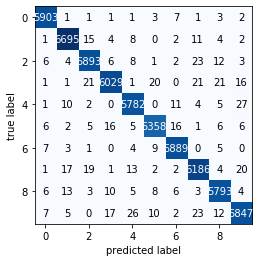

In [34]:
plot_confusion_matrix(conf_mx)
plt.show()

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris_data_set = load_iris()

In [9]:
iris_data_set.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [10]:
iris_data_set.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
iris_data_set['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
X = iris_data_set['data'][:100, [2, 3]]

In [38]:
y = iris_data_set['target'][:100]

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.svm import LinearSVC

In [41]:
linear_svm = LinearSVC()

In [42]:
linear_svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

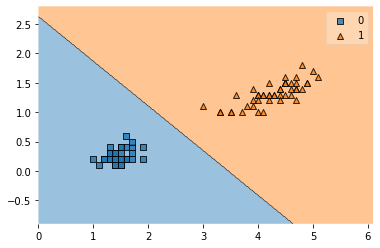

In [46]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, linear_svm)
plt.show()

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

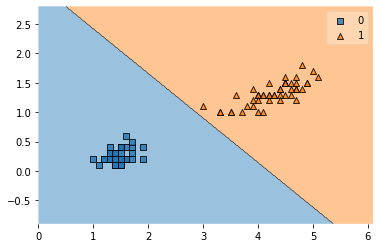

In [49]:
sgd_clf.fit(X, y)

plot_decision_regions(X, y, sgd_clf)
plt.show()

In [99]:
from sklearn.svm import SVC

svc_clf = SVC(C = .01, kernel = 'linear', verbose = True)

In [100]:
svc_clf.fit(X, y)

[LibSVM]

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

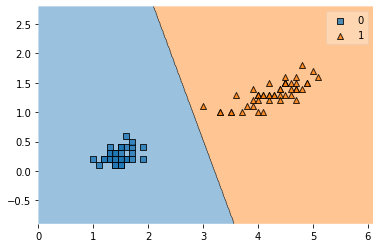

In [101]:
plot_decision_regions(X, y, svc_clf)
plt.show()